# Script that calculates and determines the best crop for a BIDS style dataset

### Imports

In [17]:
import sys
import os
from pathlib import Path

current_dir = os.getcwd()

file = Path(current_dir).resolve()
sys.path.append(str(file.parents[0]))
sys.path.append(str(file.parents[1]))
sys.path.append(str(file.parents[2]))

from TPTBox import NII
import matplotlib.pyplot as plt
import numpy as np
from utils.brats_tools import get_central_slice, plot_slices

## Testing approach with pure data loaded straight from file

### Loading Ground Truth and printing a slice for visualization

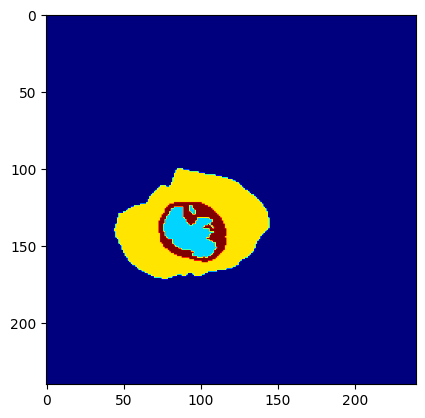

In [18]:
# load nifti as np array
base_path = '/home/student/farid_ma/dev/multiclass_softseg/MulticlassSoftSeg/data/external/ASNR-MICCAI-BraTS2023-GLI-Challenge/test/BraTS-GLI-00002-000/BraTS-GLI-00002-000'

sample_path = base_path + '-seg.nii.gz'
sample = NII.load(sample_path, seg=True)

seg_array = sample.get_array()
seg_slice = get_central_slice(seg_array)

plt.imshow(seg_slice, cmap='jet')

### Computing necessary Crop

In [19]:
max_dims = sample.shape
center = np.zeros(3, dtype=int)

for i, coordinate in  enumerate(max_dims):
    center[i] = coordinate // 2
    
print(f"max_dims: {max_dims}")
print(f"center: {center}")

max_dims: (240, 240, 155)
center: [120 120  77]


In [20]:
crop = NII.compute_crop(sample)
print(crop)

(slice(97, 174, None), slice(42, 145, None), slice(33, 119, None))


In [21]:
crop_indices = []

for i, slice in enumerate(crop):
    dist_start = slice.start
    print(f"dist_start: {dist_start}")
    dist_stop = max_dims[i] - slice.stop
    print(f"dist_stop: {dist_stop}, slice.stop: {slice.stop}")

    if dist_start > dist_stop:
        crop_indices.append(slice.stop)
    else:
        crop_indices.append(slice.start)
        
print(crop_indices)


dist_start: 97
dist_stop: 66, slice.stop: 174
dist_start: 42
dist_stop: 95, slice.stop: 145
dist_start: 33
dist_stop: 36, slice.stop: 119
[174, 42, 33]


In [22]:
center_crop = np.zeros(3, dtype=int)

for  i, coordinate  in enumerate(crop_indices):
        center_crop[i] = max(2*(coordinate - center[i]),2*(center[i] - coordinate)) 


print(center_crop)

[108 156  88]


### Symmetrical Crop around center

In [23]:
cropped_sample = sample.apply_center_crop(center_crop)

print(cropped_sample.shape)

(108, 156, 88)


(108, 156)


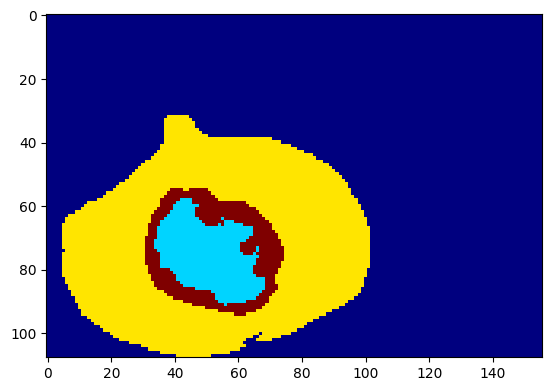

In [24]:
cropped_seg_array = cropped_sample.get_array()
cropped_seg_slice = get_central_slice(cropped_seg_array)

print(cropped_seg_slice.shape)

plt.imshow(cropped_seg_slice, cmap='jet')

### Loading image and cropping it to same size

In [25]:
img_path = base_path + '-t1c.nii.gz'
img = NII.load(img_path, seg=False)

cropped_img = img.apply_center_crop(center_crop)

print(f"img.shape: {img.shape}")
print(f"cropped_img.shape: {cropped_img.shape}")

img.shape: (240, 240, 155)
cropped_img.shape: (108, 156, 88)


In [26]:
cropped_img_array = cropped_img.get_array()
cropped_img_slice = get_central_slice(cropped_img_array)

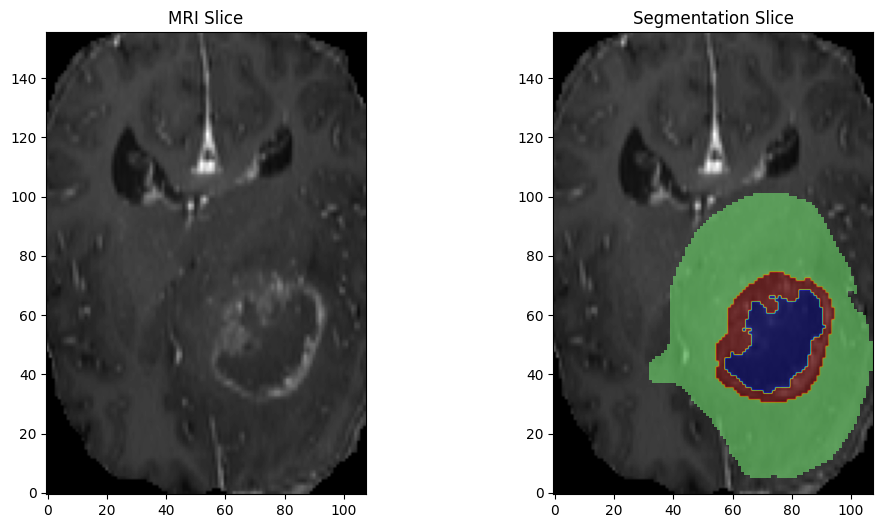

In [27]:
plot_slices(cropped_img_slice, cropped_seg_slice)

## Testing approach via List of Dicts

In [28]:
from data.bids_dataset import create_bids_path_list_of_dicts

data_dir = '/home/student/farid_ma/dev/multiclass_softseg/MulticlassSoftSeg/data/external/ASNR-MICCAI-BraTS2023-GLI-Challenge/'

val_list = create_bids_path_list_of_dicts(data_dir + '/val')
test_list = create_bids_path_list_of_dicts(data_dir + '/test')
train_list = create_bids_path_list_of_dicts(data_dir + '/train')
list_of_dicts = val_list + test_list + train_list

In [29]:
sample_path = list_of_dicts[0]['seg']
sample = NII.load(sample_path, seg=True)

# Determining the dimensions
max_dims = sample.shape
center = np.zeros(3, dtype=int)

for i, coordinate in  enumerate(max_dims):
    center[i] = coordinate // 2
    
print(f"max_dims: {max_dims}")
print(f"center: {center}")

max_dims: (240, 240, 155)
center: [120 120  77]


Subject: BraTS-GLI-01241-000
seg.shape: (240, 240, 155)
max_dims: (240, 240, 155)
center: [120 120  77]
crop: (slice(86, 171, None), slice(55, 131, None), slice(46, 138, None))
crop_indices: [172  55 139]
min_crop_dims: [104 130 124]
center_crop: [104 130 124]
iteration: 0
cropped_seg_slice.shape: (104, 130)
cropped_img_slice.shape: (104, 130)


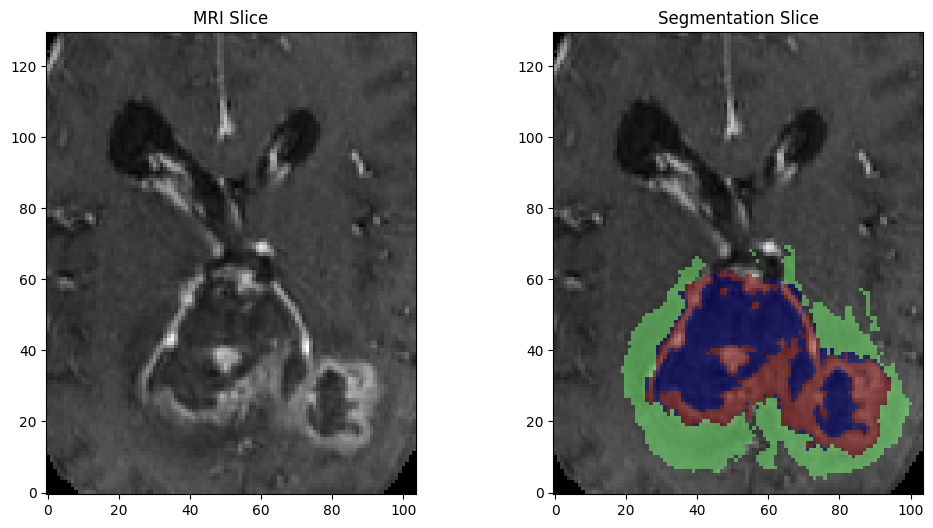

Subject: BraTS-GLI-01260-000
seg.shape: (240, 240, 155)
max_dims: (240, 240, 155)
center: [120 120  77]
crop: (slice(113, 178, None), slice(116, 204, None), slice(47, 139, None))
crop_indices: [179 205 140]
min_crop_dims: [118 170 126]
center_crop: [118 170 126]
iteration: 1
cropped_seg_slice.shape: (118, 170)
cropped_img_slice.shape: (118, 170)


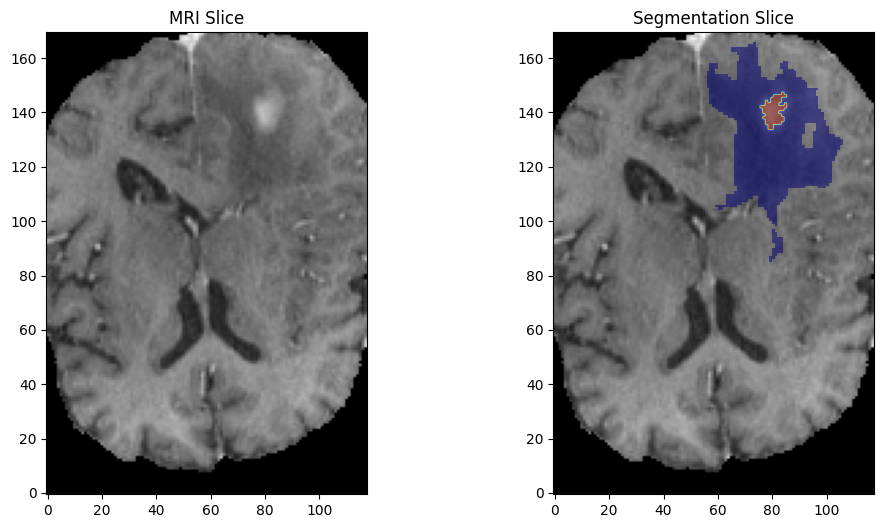

Subject: BraTS-GLI-00144-000
seg.shape: (240, 240, 155)
max_dims: (240, 240, 155)
center: [120 120  77]
crop: (slice(53, 110, None), slice(83, 164, None), slice(31, 80, None))
crop_indices: [ 53 165  31]
min_crop_dims: [134 170 126]
center_crop: [134  90  92]
iteration: 2
cropped_seg_slice.shape: (134, 90)
cropped_img_slice.shape: (134, 90)


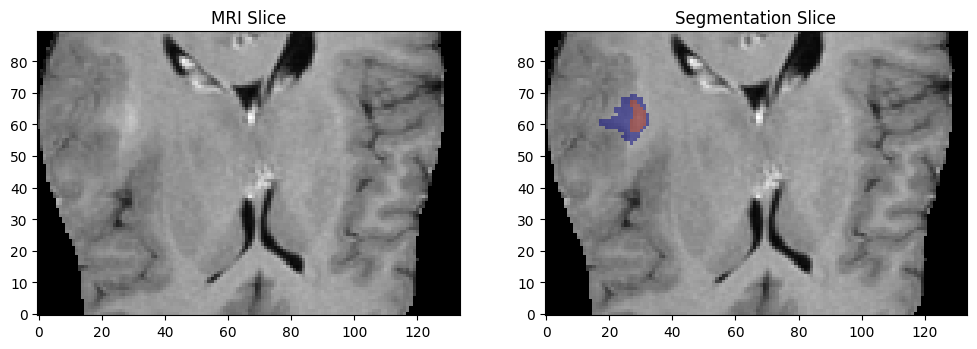

Subject: BraTS-GLI-00767-001
seg.shape: (240, 240, 155)
max_dims: (240, 240, 155)
center: [120 120  77]
crop: (slice(121, 176, None), slice(126, 190, None), slice(69, 135, None))
crop_indices: [177 191 136]
min_crop_dims: [134 170 126]
center_crop: [114 142 118]
iteration: 3
cropped_seg_slice.shape: (114, 142)
cropped_img_slice.shape: (114, 142)


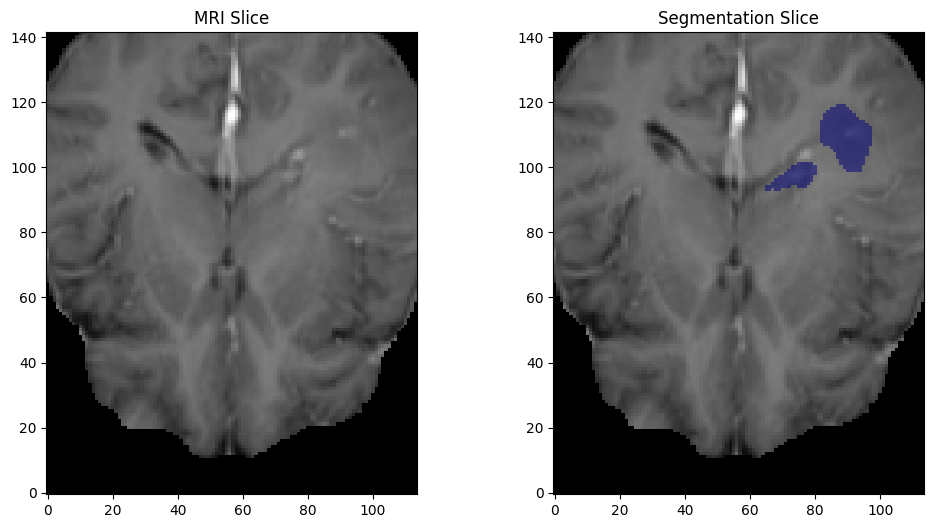

In [33]:
min_crop_dims = np.zeros(3, dtype=int)

for iteration, subject in enumerate(list_of_dicts):
    #loading segmentation for subject
    seg_path = subject['seg']
    seg = NII.load(seg_path, seg=True)

    #determining min crop of segmentation
    crop = NII.compute_crop(seg)

   # checking which slicing index is closer to the boundary of the image to have a symmetric crop
    crop_indices = np.zeros(3, dtype=int)

    for i, slice in enumerate(crop):
        dist_start = slice.start
        dist_stop = max_dims[i] - (slice.stop + 1)  # slice.stop still contains part of the segmentation -> +1
        if dist_start > dist_stop:
            crop_indices[i] = (slice.stop + 1)  # slice.stop still contains part of the segmentation -> +1
        else:
            crop_indices[i] = slice.start

    #calculating the necessary center crop i.e. size of image symmetric around the center
    center_crop = np.zeros(3, dtype=int)
    for  i, coordinate  in enumerate(crop_indices):
            center_crop[i] = max(2*(coordinate - center[i]),2*(center[i] - coordinate)) 

    # updating the min_crop_dims
    for idx, crop_dim in enumerate(center_crop):
        if crop_dim > min_crop_dims[idx]:
            min_crop_dims[idx] = crop_dim

    # printing for debugging
    print(f"Subject: {subject['subject']}")
    print(f"seg.shape: {seg.shape}")
    print(f"max_dims: {max_dims}")
    print(f"center: {center}")
    print(f"crop: {crop}")
    print(f"crop_indices: {crop_indices}")
    print(f"min_crop_dims: {min_crop_dims}")
    print(f"center_crop: {center_crop}")
    print(f"iteration: {iteration}")
    # testing single sample

    #plotting for debugging
    #cropping the segmentation and slicing in the center
    cropped_seg = seg.apply_center_crop(center_crop)
    cropped_seg_array = cropped_seg.get_array()
    cropped_seg_slice = get_central_slice(cropped_seg_array)
    print(f"cropped_seg_slice.shape: {cropped_seg_slice.shape}")

    #cropping the image and slicing in the center
    img_path = subject['t1c']
    img = NII.load(img_path, seg=False)
    cropped_img = img.apply_center_crop(center_crop)
    cropped_img_array = cropped_img.get_array()
    cropped_img_slice = get_central_slice(cropped_img_array)
    print(f"cropped_img_slice.shape: {cropped_img_slice.shape}")

    #plotting the slices
    plot_slices(cropped_img_slice, cropped_seg_slice)

    if iteration > 2:
        break